In [ ]:
!import kagglehub
!import os

/bin/bash: line 1: import: command not found
/bin/bash: line 1: import: command not found


In [ ]:
import kagglehub
path = kagglehub.dataset_download("tongpython/cat-and-dog")

Using Colab cache for faster access to the 'cat-and-dog' dataset.


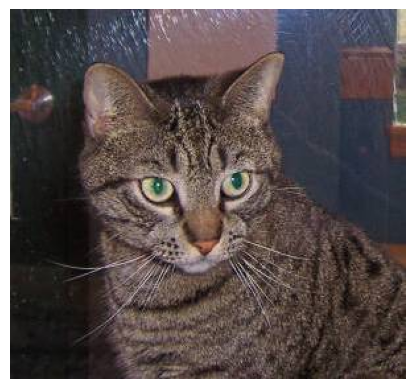

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

sample_image_path = os.path.join(path, 'training_set/training_set/cats/cat.1.jpg')

img = Image.open(sample_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


img_tensor = tf.convert_to_tensor(np.array(img), dtype=tf.float32)

if len(img_tensor.shape) == 3:
    img_tensor = tf.expand_dims(img_tensor, axis=0)

horizontal_filter = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1,-1,-1]])
vertical_filter = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, -1]])


in_channels = img_tensor.shape[-1] if len(img_tensor.shape) == 4 else 1

expanded_horizontal_filter = horizontal_filter[:, :, np.newaxis, np.newaxis]
tiled_horizontal_filter = np.tile(expanded_horizontal_filter, (1, 1, in_channels, 1))
horizonatl_filter_tensor = tf.constant(tiled_horizontal_filter, dtype=tf.float32)

expanded_vertical_filter = vertical_filter[:, :, np.newaxis, np.newaxis]
tiled_vertical_filter = np.tile(expanded_vertical_filter, (1, 1, in_channels, 1))
vertical_filter_tensor = tf.constant(tiled_vertical_filter, dtype=tf.float32)

vertical_edges = tf.nn.conv2d(img_tensor, vertical_filter_tensor, strides=1, padding='SAME')
hy = tf.nn.conv2d(img_tensor, horizonatl_filter_tensor, strides=1, padding='SAME')


In [ ]:
vertical_edges_np = vertical_edges.numpy()
horizonatl_filter_np = hy.numpy()

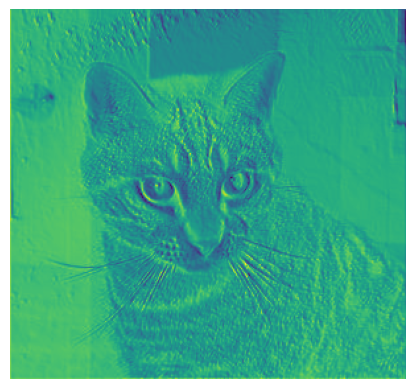

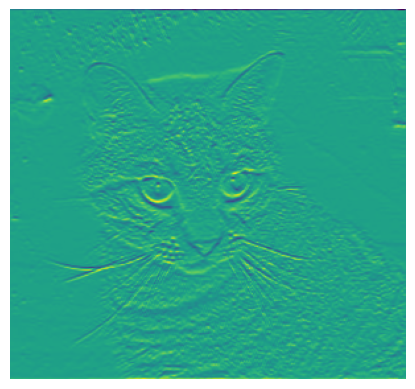

In [ ]:
plt.imshow(vertical_edges_np[0])
plt.axis('off')
plt.show()

plt.imshow(horizonatl_filter_np[0])
plt.axis('off')
plt.show()

In [ ]:
img_tensor.shape

TensorShape([1, 280, 300, 3])